# LLDa txt file Analysis

Import Libraries

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.patches as mpatches
import pandas as pd
import scipy.io as sio
import seaborn as sns
from scipy.optimize import curve_fit
from scipy.signal import find_peaks
import scipy.io as sio
import json

sns.set_style("whitegrid")

Set location equal to where the txt files are stored on your computer.

In [2]:
location = '/Users/brynlasher/Dropbox/'

Dropbox location where the data is:

The functions...

In [3]:
%run ./Analysis-Functions.ipynb

Use this table to find neurons you might be interested in.

In [4]:
print(printDataframe(location))

               Name  itd Peak  itd Trough  itd Best Value  itd Halfwidth  \
0    670.01 12_4_06      15.3         8.1            30.0           94.2   
1    670.03 12_4_06      14.3         8.0             0.0          107.4   
2    670.04 12_4_06      14.7         4.4          -210.0           95.4   
3    670.05 12_4_06      10.9         4.9            90.0          129.0   
4    670.06 12_4_06       9.6         4.8           -60.0           99.6   
5   670.01 11_27_06      11.3         6.0           150.0          149.4   
6   670.02 11_27_06      21.9         2.1          -120.0          139.8   
7   670.03 11_27_06      19.1         5.9          -300.0           46.2   
8   670.04 11_27_06      15.1         3.0          -300.0           91.2   
9   670.05 11_27_06      22.4         5.6           -30.0          187.8   
10  670.06 11_27_06      14.4         0.2          -210.0          217.2   
11  670.08 11_27_06      11.0         4.6           -30.0          125.4   
12  670.09 1

# Functions to choose from

This function takes in a name of a neuron as a string and returns a list of all the file names for this neuron. Returns a list with the file names in the order of itd, iid, bf. If the file does not exist the list will hold the value None. If the name doesn't exist, it will return an empty list.

This function takes in the name of the neuron as a string, either itd, iid, or bf as a string, and the loaction of the files on your computer as a string. It will return the tuning curve plot of this neuron.

This function returns a class object that has several atributes that can be used for further analysis of the data. It takes in the name of the neuron as a string, either itd, iid, or bf as a string, and the loaction of the files on your computer as a string.

List of attributes:

peak - The peak

trough - The trough

BV - Best value

HW - Halfwidth

parameters - List of unique parameters

mean_count - List of mean cout data

sd - List of standard deviation

# Examples

Example of filename_search function:

Parameter is the string name of the neuron wanted for further analysis. Returns a list of txt file names in the order of itd, iid, and bf. This function is used if the users wants to see the raw txt files.

In [5]:
# filename_search function

print("The file names for neuron 896.05 1_23_07")
print(filename_search("896.05 1_23_07"), "\n")

print("The file names for neuron 664.04 10_5_06")
print("Note that there is only a bf file for this neuron.")
print(filename_search("664.04 10_5_06"), "\n")

print("What happens when you put in an incorrect name.")
print(filename_search("fake name"), "\n")

The file names for neuron 896.05 1_23_07
['LLDa/date/1_23_07/1_23_07_data/896.05.3.itd', 'LLDa/date/1_23_07/1_23_07_data/896.05.1.iid', 'LLDa/date/1_23_07/1_23_07_data/896.05.2.bf'] 

The file names for neuron 664.04 10_5_06
Note that there is only a bf file for this neuron.
[None, None, 'LLDa/date/10_5_06/10_5_06_data/664.04.1.bf'] 

What happens when you put in an incorrect name.
[] 



Example of tuningCurveName function:

Parameters are the string name of the neuron, the string of the type of auditory spatial cue ("itd", "iid", and "bf", and the location on the user's computer. This function prints the tuning curve requested with a visual of the halfwidth as well as a numeric value of the halfwidth.

The tuning curve for 670.06 11_27_06, itd.


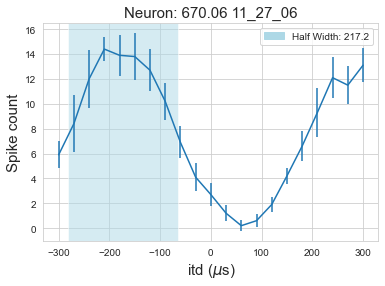

tuning curve returned successfully 

The tuning curve for 670.06 11_27_06, iid.


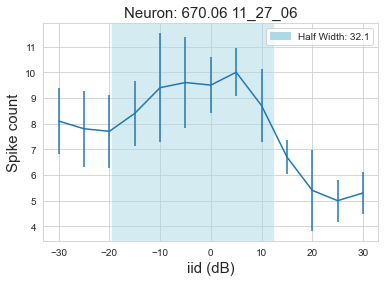

tuning curve returned successfully 

The tuning curve for 670.06 11_27_06, bf.


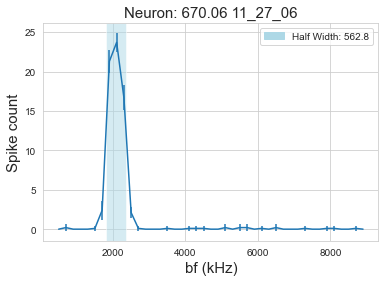

tuning curve returned successfully 

The tuning curve for a neuron that does exist, itd.
Invalid name 

The tuning curve for 670.06 11_27_06, with a kind that doesn't exist.
Invalid kind 

The tuning curve for a neuron that doesn't exist with a kind that doesn't exist.
Invalid kind and invalid name 



In [6]:
# tuningCurveName function

print("The tuning curve for 670.06 11_27_06, itd.")
print(tuningCurveName('670.06 11_27_06', 'itd', location), "\n")


print("The tuning curve for 670.06 11_27_06, iid.")
print(tuningCurveName('670.06 11_27_06', 'iid', location), "\n")


print("The tuning curve for 670.06 11_27_06, bf.")
print(tuningCurveName('670.06 11_27_06', 'bf', location), "\n")


print("The tuning curve for a neuron that does exist, itd.")
print(tuningCurveName('fake name', 'itd', location), "\n")


print("The tuning curve for 670.06 11_27_06, with a kind that doesn't exist.")
print(tuningCurveName('670.06 11_27_06', 'fake kind', location), "\n")


print("The tuning curve for a neuron that doesn't exist with a kind that doesn't exist.")
print(tuningCurveName('fake name', 'fake kind', location), "\n")


Example of getData function:

Parameters are the string name of the neuron, the string of the type of auditory spatial cue ("itd", "iid", and "bf", and the location on the user's computer. This function returns a Data object that holds atrributes that can be returned to get information about the neuron, such as the peak, trough, best value, parameter list, mean count, snd the standard deviation.

In [7]:
# getData function

# the neuron we want data from
name = '670.06 11_27_06'

# the kind we want
kind = 'itd'

# setting variable d to the data
d = getData(name, kind, location)

# print each attribute from the data
peak = d.peak
trough = d.trough
best_value = d.BV
halfwidth = d.HW
parameters = d.parameters
mean_count = d.mean_count
standard_deviation = d.sd
print("peak:", peak, "\n")
print("trough:", trough, "\n")
print("best value:", best_value, "\n")
print("halfwidth:", halfwidth, "\n")
print("parameter list:", parameters, "\n")
print("mean count:", mean_count, "\n")
print("standard deviation:", standard_deviation, "\n")

peak: 14.4 

trough: 0.2 

best value: -210.0 

halfwidth: 217.2 

parameter list: [-300 -270 -240 -210 -180 -150 -120  -90  -60  -30    0   30   60   90
  120  150  180  210  240  270  300] 

mean count: [ 5.9  8.4 12.  14.4 13.9 13.8 12.7 10.2  6.9  4.1  2.7  1.2  0.2  0.6
  1.9  4.2  6.6  9.3 12.1 11.5 13.1] 

standard deviation: [1.10050493 2.27058485 2.30940108 0.96609178 1.66332999 1.87379591
 1.70293864 1.47572957 1.28668394 1.10050493 0.9486833  0.63245553
 0.42163702 0.51639778 0.56764621 0.63245553 1.17378779 2.00277585
 1.66332999 1.50923086 1.37032032] 

